<a target="_blank" href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-lstm-forecasting/blob/main/Project01_LSTM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Loading data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats
import os

In [3]:
path="/content/drive/MyDrive/smart_parking/data/"

In [4]:
NYC_PM = pd.read_csv(path + "NYC_PM.csv")
#NYC_PM = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv")
NYC_PM.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [ ]:
NYC_PM.shape

(169999, 31)

In [ ]:
NYC_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

In [ ]:
NYC_PM.describe()

,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
count,1.699990e+05,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,...,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000
mean,1.634506e+09,40.826202,-73.892555,78.485926,8.056747,1.885382,0.551209,0.806628,0.578003,0.367173,...,0.000247,0.000159,0.000118,0.000059,0.000065,0.000047,0.000141,17.432182,56.241018,4.310939
std,2.197971e+06,0.017215,0.019362,148.612154,22.639578,4.616222,1.461197,1.969984,1.535912,1.020670,...,0.016086,0.012602,0.010846,0.007669,0.008044,0.006860,0.012366,6.659859,16.583384,1.794719
min,1.631277e+09,40.711689,-73.934052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,1.568473
25%,1.632808e+09,40.813564,-73.911232,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000,42.200000,3.162405
50%,1.633554e+09,40.818981,-73.892303,39.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,55.300000,4.251249
75%,1.636266e+09,40.845383,-73.870804,92.000000,9.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.600000,69.000000,4.786389
max,1.639579e+09,40.904430,-73.820808,6233.000000,2493.000000,305.000000,106.000000,101.000000,92.000000,59.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,32.400000,100.000000,12.744419


In [ ]:
NYC_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [5]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

NYC_PM['time'] = pd.to_datetime(NYC_PM['time'], unit='s')
#NYC_PM.drop("SensorID",axis=1,inplace=True)


# the first 5 rows
print(NYC_PM .head())

      SensorID                time   latitude  longitude  bin0  bin1  bin2  \
0  NYCP2_CS01A 2021-09-10 12:35:04  40.847672 -73.869316    11     1     1   
1  NYCP2_CS01A 2021-09-10 12:35:08  40.847668 -73.869316    22     4     1   
2  NYCP2_CS01A 2021-09-10 12:35:13  40.847649 -73.869362    40     1     1   
3  NYCP2_CS01A 2021-09-10 12:35:18  40.847649 -73.869362    26     1     0   
4  NYCP2_CS01A 2021-09-10 12:35:23  40.847649 -73.869362    44     4     0   

   bin3  bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0     0  ...      0      0      0      0      0      0      0   
1     0     0     2  ...      0      0      0      0      0      0      0   
2     0     0     1  ...      0      0      0      0      0      0      0   
3     0     0     0  ...      0      0      0      0      0      0      0   
4     1     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508

In [ ]:
print(NYC_PM.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25'],
      dtype='object')


In [6]:
NYC_PM=NYC_PM.drop(columns=['SensorID', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23'])

# manually specify column names
NYC_PM.columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']
#NYC_PM.set_index('time', inplace=True)
#NYC_PM.index.name = 'date'

print(NYC_PM .head())
# save to file
NYC_PM.to_csv('NYC_PM_edited.csv')

                 time   latitude  longitude  temperature  humidity  pollution
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503


# Geohashing and geospatial join

In [7]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15544 sha256=3a764c85affcd988c4cb56d93b273c8040d81fc395f4ec51b428277275fc7db2
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


In [8]:
import pandas as pd
import numpy as np
import geohash2
from geohash2 import encode

# We want to gain the geohash of the latitude and longitude columns:
def calculate_geohash(row):
    return encode(row['latitude'], row['longitude'], precision=7)
#Adding a geohash column to the table
NYC_PM['geohash'] = NYC_PM.apply(calculate_geohash, axis=1)
print(NYC_PM.head())

#grouping the data by geohash
grouped_data = NYC_PM.groupby('geohash')

                 time   latitude  longitude  temperature  humidity  pollution  \
0 2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
1 2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2 2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
3 2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
4 2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

   geohash  
0  dr72rh4  
1  dr72rh4  
2  dr72rh1  
3  dr72rh1  
4  dr72rh1  


In [ ]:
type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

In [9]:
#Trick to convert GroupByDataFrame object to DataFrame object
grouped_data = grouped_data.apply(lambda x: x)

In [10]:
grouped_data = grouped_data.reset_index(drop=True).set_index('time')

In [ ]:
grouped_data.head()

,latitude,longitude,temperature,humidity,pollution,geohash
time,,,,,,
2021-10-29 14:42:46,40.711689,-73.934052,13.7,64.0,3.187280,dr5rte6
2021-10-29 13:54:43,40.740944,-73.898811,14.0,59.3,3.084182,dr5ry2s
2021-09-22 14:29:24,40.745430,-73.844795,29.6,60.3,12.593311,dr5rz97
2021-09-22 14:29:29,40.745434,-73.844795,29.6,60.3,12.682212,dr5rz97
2021-09-22 14:29:34,40.745438,-73.844803,29.6,60.3,12.626368,dr5rz97


In [ ]:
print(len(NYC_PM))
print(len(grouped_data))

169999
169999


In [ ]:
print(len(grouped_data)/len(NYC_PM))

1.0


In [11]:
def decode_geohash(geohash):
    return geohash2.decode(geohash)

In [12]:
#Change latitude, longitude column by decoding geohash and receiving center of geohash
latitude = []
longitude = []
for i in grouped_data['geohash'].values:
  latitude.append(decode_geohash(i)[0])
  longitude.append(decode_geohash(i)[1])

In [13]:
grouped_data['latitude'] = latitude
grouped_data['longitude'] = longitude

In [ ]:
grouped_data.head()

,latitude,longitude,temperature,humidity,pollution,geohash
time,,,,,,
2021-10-29 14:42:46,40.71,-73.93,13.7,64.0,3.187280,dr5rte6
2021-10-29 13:54:43,40.74,-73.9,14.0,59.3,3.084182,dr5ry2s
2021-09-22 14:29:24,40.74,-73.85,29.6,60.3,12.593311,dr5rz97
2021-09-22 14:29:29,40.74,-73.85,29.6,60.3,12.682212,dr5rz97
2021-09-22 14:29:34,40.74,-73.85,29.6,60.3,12.626368,dr5rz97


In [14]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
#nyc_map = gpd.read_file(path + "nyc_polygon.geojson")
nyc_map = gpd.read_file("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson")

In [16]:
from shapely.geometry import Point

#Perform spatial join of NYC Pollution data with NYC Geometry data
grouped_data['geometry'] = grouped_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
pollution_geo = gpd.GeoDataFrame(grouped_data, geometry='geometry')

merged_data = gpd.sjoin(nyc_map, pollution_geo, how='right', op='contains')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-16-5c5da2e58874>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(nyc_map, pollution_geo, how='right', op='contains')


In [17]:
merged_data = merged_data.drop('index_left', axis=1)

In [ ]:
merged_data.head()

,neighborhood,boroughCode,borough,@id,latitude,longitude,temperature,humidity,pollution,geohash,geometry
time,,,,,,,,,,,
2021-10-29 14:42:46,Williamsburg,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,40.71,-73.93,13.7,64.0,3.187280,dr5rte6,POINT (-73.93000 40.71000)
2021-10-29 13:54:43,Maspeth,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,40.74,-73.9,14.0,59.3,3.084182,dr5ry2s,POINT (-73.90000 40.74000)
2021-09-22 14:29:24,Corona,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,40.74,-73.85,29.6,60.3,12.593311,dr5rz97,POINT (-73.85000 40.74000)
2021-09-22 14:29:29,Corona,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,40.74,-73.85,29.6,60.3,12.682212,dr5rz97,POINT (-73.85000 40.74000)
2021-09-22 14:29:34,Corona,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,40.74,-73.85,29.6,60.3,12.626368,dr5rz97,POINT (-73.85000 40.74000)


In [18]:
merged_data = merged_data.dropna()

In [19]:
merged_data['latitude'] = merged_data['latitude'].astype(float)
merged_data['longitude'] = merged_data['longitude'].astype(float)

In [ ]:
merged_data.dtypes

neighborhood      object
boroughCode       object
borough           object
@id               object
latitude         float64
longitude        float64
temperature      float64
humidity         float64
pollution        float64
geohash           object
geometry        geometry
dtype: object

In [ ]:
print(len(merged_data))

169829


# Stratified Sampling

In [20]:
# Taking 80% of data from each geohashed value
stratified_proportions = merged_data['geohash'].value_counts().values * 0.8
stratified_proportions = stratified_proportions.astype(int)
stratified_proportions = stratified_proportions[stratified_proportions > 0]

In [ ]:
stratified_proportions.sum()

135380

In [21]:
merged_data['geohash'].value_counts()

geohash
dr72r5c    18297
dr72nqu     9450
dr72rh1     9425
dr72njf     6181
dr72r59     4293
           ...  
dr72qsj        1
dr72qfh        1
dr72qez        1
dr72qdb        1
dr7885j        1
Name: count, Length: 1159, dtype: int64

In [ ]:
stratified_proportions

array([14637,  7560,  7540, ...,     1,     1,     1])

In [22]:
#Stratified Sampling
stratified_sampled_dataset = pd.DataFrame(columns=merged_data.columns)
index = 0

for geohash in merged_data['geohash'].value_counts().keys()[:len(stratified_proportions)].values:
  sample = merged_data[merged_data['geohash'] == geohash].sample(stratified_proportions[index])
  index += 1
  stratified_sampled_dataset = pd.concat([stratified_sampled_dataset, sample])

In [23]:
stratified_sampled_dataset.head()

,neighborhood,boroughCode,borough,@id,latitude,longitude,temperature,humidity,pollution,geohash,geometry
2021-10-03 06:12:05,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,19.1,66.7,5.425232,dr72r5c,POINT (-73.87000 40.85000)
2021-12-14 20:08:33,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,13.1,26.6,4.348238,dr72r5c,POINT (-73.87000 40.85000)
2021-10-05 17:50:01,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,19.3,72.4,3.576590,dr72r5c,POINT (-73.87000 40.85000)
2021-10-08 05:19:18,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,18.7,85.7,4.283659,dr72r5c,POINT (-73.87000 40.85000)
2021-10-28 18:00:24,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,16.6,53.1,3.863642,dr72r5c,POINT (-73.87000 40.85000)


In [ ]:
print(len(stratified_sampled_dataset))

135380


In [24]:
merged_data = stratified_sampled_dataset

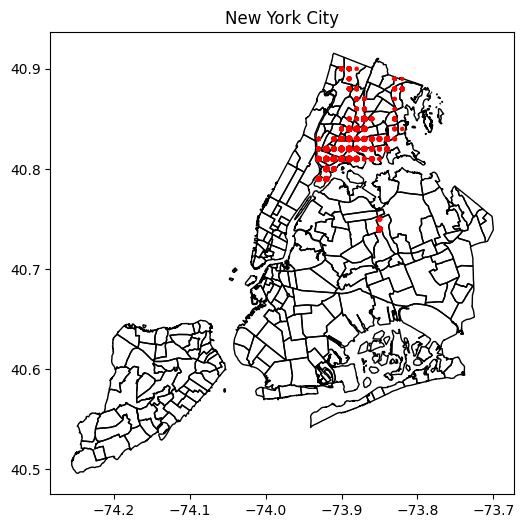

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(merged_data['longitude'], merged_data['latitude'], s=merged_data['pollution'], color='red', alpha=0.5)

ax.set_title("New York City")
plt.show()

In [ ]:
print("Areas containing pollution")
print("Latitude range = [" + str(min(merged_data['latitude'])) + " -- "  + str(max(merged_data['latitude'])) + "]")
print("Longitude range = [" + str(min(merged_data['longitude'])) + " -- "  + str(max(merged_data['longitude'])) + "]")

Areas containing pollution
Latitude range = [40.74 -- 40.9]
Longitude range = [-73.93 -- -73.82]


In [ ]:
#Average areas with pollution
print("Average pollution areas:")
print(sum(merged_data['latitude'])/ len(merged_data))
print(sum(merged_data['longitude'])/ len(merged_data))

Average pollution areas:
40.82665105626323
-73.89250871625735


In [ ]:
merged_data = merged_data.fillna("Unknown")

In [ ]:
areas = merged_data['borough'].unique()

In [ ]:
groups = []
for area in areas:
  groups.append(merged_data[merged_data['borough'] == area])

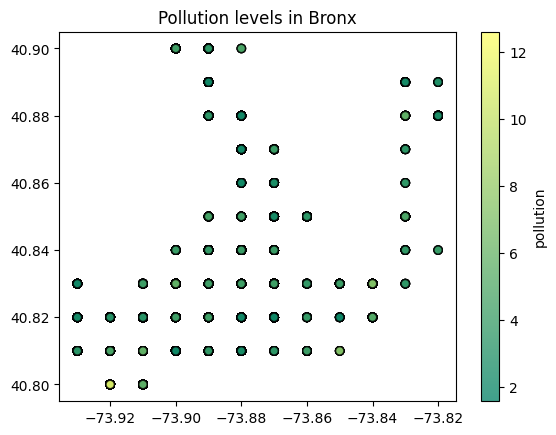

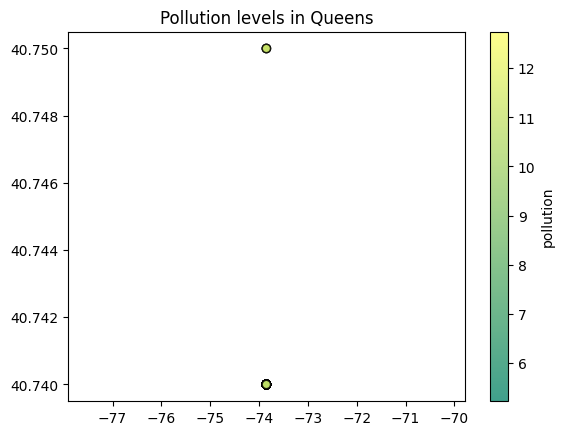

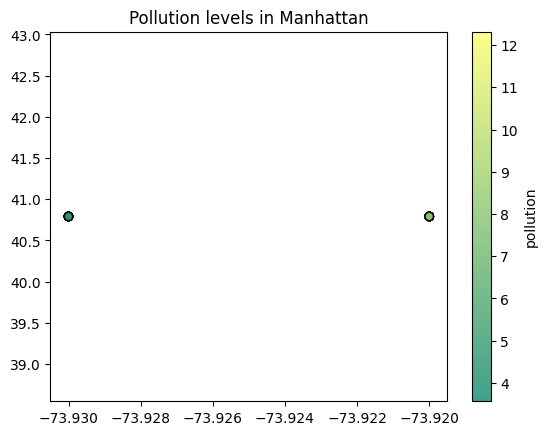

In [ ]:
index = 0
for area in areas:
  scatter_plot = plt.scatter(groups[index]['longitude'], groups[index]['latitude'], c=groups[index]['pollution'], cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)
  colorbar = plt.colorbar(scatter_plot, label='pollution')
  plt.title("Pollution levels in " + str(area))
  plt.show()
  index += 1

In [ ]:
merged_data['geohash'].value_counts()

geohash
dr72r5c    14637
dr72nqu     7560
dr72rh1     7540
dr72njf     4944
dr72r59     3434
           ...  
dr72j9x        1
dr72nzn        1
dr72j9p        1
dr72qve        1
dr72n5d        1
Name: count, Length: 1081, dtype: int64

# Feature selection

```TODO```
- develop a method to select features, is there an association between pollution (pm25) and the location expressed as geohash (or on a coarser level any other administrative polygon such as neighborhood)?!
so, imagine, you have a categorical variable (geohash) and a numerical response (pm25), which method you can choose for feature selection.
  > read the following article:
  [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/). Of a specific interest in this case is the ```Categorical Input, Numerical Output``` combination, in which it is recommended to use the same “Numerical Input, Categorical Output” methods <font color='red'> but in reverse </font>

for all methods below, try neighborhood, borough, geohash with different precision to check wether there is an association between any of them and the respone (pollution pm)


In [ ]:
# Calculate maximum and minimum pollution values
max_pollution = merged_data['pollution'].max()
min_pollution = merged_data['pollution'].min()

print(f"Maximum pollution value: {max_pollution}")
print(f"Minimum pollution value: {min_pollution}")

Maximum pollution value: 12.74441924
Minimum pollution value: 1.568473024


In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('geohash')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('geohash').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")


Reverse Kendall's correlation coefficient: 0.18607703406282353


In [ ]:
merged_data.head(2)

,neighborhood,boroughCode,borough,@id,geohash,latitude,longitude,temperature,humidity,pollution,geometry
date,,,,,,,,,,,
2021-10-29 14:42:46,Williamsburg,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,dr5rte6fg8,40.71169,-73.9341,13.7,64.0,3.187280,POINT (-73.93410 40.71169)
2021-10-29 13:54:43,Woodside,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,dr5ry2st0y,40.74094,-73.8988,14.0,59.3,3.084182,POINT (-73.89880 40.74094)


In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient
import pandas as pd
from scipy.stats import spearmanr
'''
Spearman's Rank Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable when the relationship is monotonic but not necessarily linear.
'''
# Assuming you already have merged_data DataFrame

# Calculate Spearman's rank correlation coefficient
#try neighborhood, borough, geohash with different precision
correlation, p_value = spearmanr(merged_data['geohash'], merged_data['pollution'])

print(f"Spearman's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Spearman's correlation coefficient: -0.014097254580679256
P-value: 6.1469448122903754e-09


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)
'''
ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise, you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.

'''

from scipy.stats import f_oneway

# Assuming you already have merged_data DataFrame

# Extract pollution levels for each geohash category
#try neighborhood, borough, geohash with different precision

geohash_groups = [merged_data[merged_data['geohash'] == category]['pollution'] for category in merged_data['geohash'].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*geohash_groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 102.7879624361052
P-value: 0.0


In [ ]:
# METHOD 4:
from scipy.stats import kruskal
'''
Kruskal-Wallis test
Kruskal-Wallis Test: This is a non-parametric alternative to ANOVA, suitable when the assumptions of ANOVA are not met.
'''

# Extract pollution levels for each geohash category
geohash_groups = [merged_data[merged_data['geohash'] == category]['pollution'] for category in merged_data['geohash'].unique()]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*geohash_groups)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis statistic: 5683.476319993051
P-value: 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
'''
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
'''
from scipy.stats import kendalltau

# Calculate Kendall's Tau correlation coefficient
correlation, p_value = kendalltau(merged_data['geohash'], merged_data['pollution'])

print(f"Kendall's correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Kendall's correlation coefficient: -0.009253951935959702
P-value: 3.382577707524905e-08


# End feature selection

In [ ]:
merged_data.head()

,neighborhood,boroughCode,borough,@id,latitude,longitude,temperature,humidity,pollution,geohash,geometry
2021-10-28 11:09:01,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,9.4,74.8,3.551666,dr72r5c,POINT (-73.87000 40.85000)
2021-11-05 23:26:42,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,8.5,51.6,4.324466,dr72r5c,POINT (-73.87000 40.85000)
2021-12-05 14:04:32,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,7.4,37.0,4.348238,dr72r5c,POINT (-73.87000 40.85000)
2021-10-01 05:43:52,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,12.4,77.8,2.815540,dr72r5c,POINT (-73.87000 40.85000)
2021-10-12 14:04:07,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.85,-73.87,19.4,76.0,4.755063,dr72r5c,POINT (-73.87000 40.85000)


In [26]:
import numpy as np

# Select the desired features and add the index as a new column
dataset = merged_data[['latitude', 'longitude', 'temperature', 'humidity', 'pollution']]
dataset['time'] = merged_data.index

# Convert the datetime index to float timestamps
dataset['time'] = dataset['time'].apply(lambda x: x.timestamp())

# Convert the DataFrame to a NumPy array
values_df = dataset[['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']]

<ipython-input-26-17c1cced5580>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['time'] = merged_data.index
<ipython-input-26-17c1cced5580>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['time'] = dataset['time'].apply(lambda x: x.timestamp())


In [27]:
values = values_df.to_numpy()

In [ ]:
type(values)

numpy.ndarray

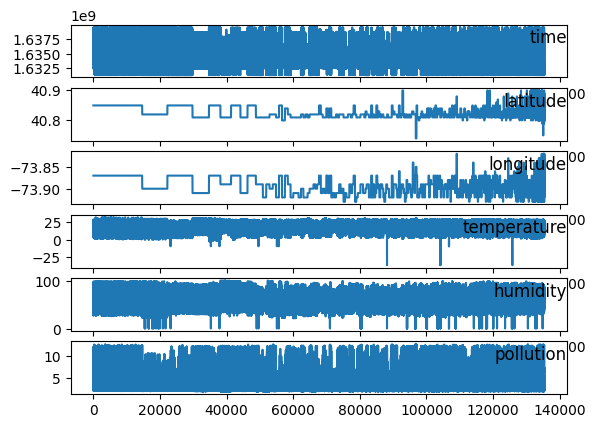

In [28]:
from pandas import read_csv
from matplotlib import pyplot

#we are reading our new dataframe
#header=0 means that the first row contains the column names and index_col=0 means that the first column is my indexing for my dataframe
#dataset=NYC_PM.drop(['geohash', 'geometry'], axis=1)

# here we want to save all numerical values from our dataframe to the numpy array. every row of the dataframe will be a row in our array
#and each column in our dataframe will be a column in our array. Interesting


#we want to plot our columns. we specify them
groups=[0,1,2,3,4,5]
#we are using matplotlib
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(values_df.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()


# Correlation matrix

<font color = 'blue'> from the correlation matrix, looks like the ```temperature``` is the variable that has the highest correlation with the reponse varaible ```pollution```, at the par with 0.49, other variables are less significant</font>
- having said that, drop some of the predictors (input variables)and test the performance of your algorithms again! does the performance improves in terms of accuracy, and running time!

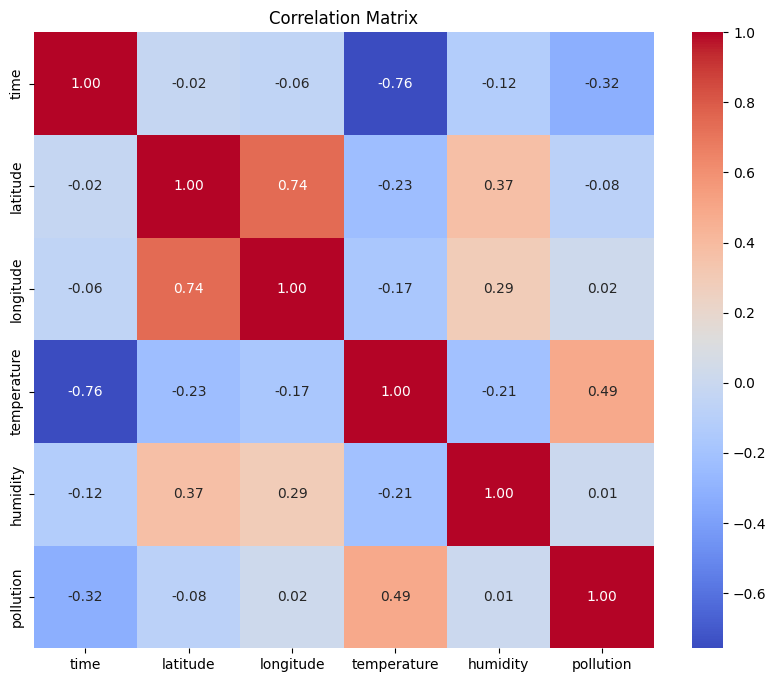

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have merged_data DataFrame

# Calculate the correlation matrix
correlation_matrix = values_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


In [30]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]

        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]


    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
          agg.dropna(inplace=True)
    return agg

In [ ]:
dataset.dtypes

latitude       float64
longitude      float64
temperature    float64
humidity       float64
pollution      float64
time           float64
dtype: object

In [ ]:
values.shape

(135380, 6)

In [31]:
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.236633,0.687485,0.54541,0.808357,0.667,0.323359,0.991989,0.687485,0.54541,0.721902,0.266,0.223794
2,0.991989,0.687485,0.54541,0.721902,0.266,0.223794,0.262497,0.687485,0.54541,0.811239,0.724,0.152457
3,0.262497,0.687485,0.54541,0.811239,0.724,0.152457,0.288284,0.687485,0.54541,0.802594,0.857,0.217824
4,0.288284,0.687485,0.54541,0.802594,0.857,0.217824,0.501923,0.687485,0.54541,0.772334,0.531,0.178994
5,0.501923,0.687485,0.54541,0.772334,0.531,0.178994,0.642624,0.687485,0.54541,0.662824,0.585,0.061662


In [32]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9,10,11]], axis=1, inplace=True)# from the outcome it needs the pullution column, so we delete the rest of the columns
print(reframed.head())
# as we can see we have 5 columns for input and one column for out put that is only our pollution

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)
1   0.236633   0.687485    0.54541   0.808357      0.667   0.323359
2   0.991989   0.687485    0.54541   0.721902      0.266   0.223794
3   0.262497   0.687485    0.54541   0.811239      0.724   0.152457
4   0.288284   0.687485    0.54541   0.802594      0.857   0.217824
5   0.501923   0.687485    0.54541   0.772334      0.531   0.178994


In [63]:
# split into train and test sets
#we are taking all the values from the dataframe:reframed into a 2 Dim Numpy array that list in that array row will be one row
#Each row is represented by an inner array, and the outer array holds the entire structure.It is like a matrix
...
# split into train and test sets
values = reframed.values
n_train_hours = int((365 * 12) * 24)
#We are preparing the train data from the first year
#[rows,columns] ==> rows~~[start:end:step] rows of first year, all columns
# but how do you know that the first n_train_hours rows in  your original dataset represents a year, it is sorted
train = values[:n_train_hours, :]

In [ ]:
len(train)

105120

In [64]:

#we set the rest of information as a test
test = values[n_train_hours:, :]
# split into input and outputs
#train_X: we take all the rows  for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollution
#train_y takes all the rows for one year and only the column -1 which is the last column:pollution
train_X, train_y = train[:], train[:, -1]
test_X, test_y = test[:], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
# we know that each row of the train _X belongs to the information of 8 variable for one day of the year. now
#we want to relate it to 1=timestep. we have 3D array the first variable is the number of rows,
#the second the timestep and the last one is the number of columns
# Reshape input data to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shape of train_X: (105120, 1, 6)
(105120, 1, 6) (105120,) (30259, 1, 6) (30259,)


In [35]:
print("Train/Test split")
print(test_X.shape[0] / train_X.shape[0])
print(1 - (test_X.shape[0] / train_X.shape[0]))

Train/Test split
0.2878519786910198
0.7121480213089801


In [36]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
1460/1460 - 6s - loss: 0.0927 - val_loss: 0.0377 - 6s/epoch - 4ms/step
Epoch 2/50
1460/1460 - 4s - loss: 0.0101 - val_loss: 0.0080 - 4s/epoch - 3ms/step
Epoch 3/50
1460/1460 - 4s - loss: 0.0062 - val_loss: 0.0067 - 4s/epoch - 3ms/step
Epoch 4/50
1460/1460 - 3s - loss: 0.0051 - val_loss: 0.0057 - 3s/epoch - 2ms/step
Epoch 5/50
1460/1460 - 3s - loss: 0.0044 - val_loss: 0.0052 - 3s/epoch - 2ms/step
Epoch 6/50
1460/1460 - 4s - loss: 0.0040 - val_loss: 0.0048 - 4s/epoch - 3ms/step
Epoch 7/50
1460/1460 - 4s - loss: 0.0036 - val_loss: 0.0045 - 4s/epoch - 3ms/step
Epoch 8/50
1460/1460 - 4s - loss: 0.0034 - val_loss: 0.0041 - 4s/epoch - 3ms/step
Epoch 9/50
1460/1460 - 3s - loss: 0.0031 - val_loss: 0.0038 - 3s/epoch - 2ms/step
Epoch 10/50
1460/1460 - 4s - loss: 0.0029 - val_loss: 0.0036 - 4s/epoch - 3ms/step
Epoch 11/50
1460/1460 - 4s - loss: 0.0028 - val_loss: 0.0036 - 4s/epoch - 3ms/step
Epoch 12/50
1460/1460 - 3s - loss: 0.0026 - val_loss: 0.0032 - 3s/epoch - 2ms/step
Epoch 13/50
1

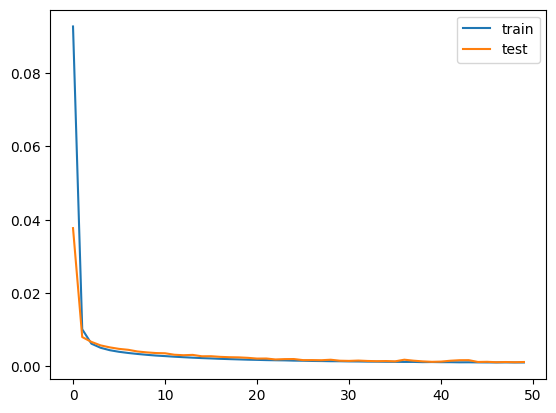

In [37]:
# design network
model = Sequential()
model.add(LSTM(1, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X , train_y, epochs=50, validation_data=(test_X, test_y), batch_size=72, verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [65]:
lstm_yhat = model.predict(test_X)
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_inv_yhat = concatenate((test_X1[:, 1:], lstm_yhat), axis=1)
lstm_predicted_df = pd.DataFrame(scaler.inverse_transform(lstm_inv_yhat), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution'])
lstm_inv_yhat = lstm_inv_yhat[:,-1]

test_y1 = test_y.reshape((len(test_y), 1))
lstm_inv_y1 = concatenate((test_X1[:, 1:], test_y1), axis=1)
lstm_actual_df = pd.DataFrame(scaler.inverse_transform(lstm_inv_y1), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution'])
lstm_inv_y1 = lstm_inv_y1[:,-1]

# Calculate rmse
rmse_LSTM = sqrt(mean_squared_error(lstm_inv_y1, lstm_inv_yhat))

# Calculate mse
mse_LSTM=mean_squared_error(lstm_inv_y1, lstm_inv_yhat)

# Calculate mae
mae_LSTM=mae(lstm_inv_y1, lstm_inv_yhat)

# Calculate Maximum Prediction Error
max_prediction_error_LSTM = np.max(np.abs(lstm_inv_y1, lstm_inv_yhat))

# Calculate the number of correct predictions

total_correct_predictions_LSTM=0
K=np.zeros(len(lstm_inv_yhat))
K1=np.zeros(len(lstm_inv_yhat))

for i in range(1, len(lstm_inv_yhat)):
    if lstm_inv_yhat[i] > lstm_inv_yhat[i-1]:
        K[i]=1
    if lstm_inv_yhat[i] < lstm_inv_yhat[i-1]:
        K[i]=0
    if lstm_inv_y1[i] > lstm_inv_y1[i-1]:
        K1[i]=1
    if lstm_inv_y1[i] < lstm_inv_y1[i-1]:
        K1[i]=0
for i in range(1, len(lstm_inv_yhat)):
    if K[i]==K1[i]:
        total_correct_predictions_LSTM=total_correct_predictions_LSTM+1



# Calculate Accuracy
num_total_samples = len(lstm_inv_y1)
accuracy_LSTM = total_correct_predictions_LSTM / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_LSTM = 1 - accuracy_LSTM

# Print the results
print(f'Test RMSE: {rmse_LSTM:.3f}')
print(f'Test MSE: {mse_LSTM:.5f}')
print(f'Test MAE: {mae_LSTM:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_LSTM:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_LSTM}')
print(f'Accuracy: {accuracy_LSTM * 100:.2f}')
print(f'error rate: {error_rate_LSTM * 100:.2f}')

946/946 [==============================] - 2s 2ms/step
Test RMSE: 0.003
Test MSE: 0.00001
Test MAE: 0.00118
Maximum Prediction Error: 0.994
Predict the correct number of days: 30258
Accuracy: 100.00
error rate: 0.00


In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Design and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')  # You may need to tune the hyperparameters
svr_model.fit(train_X.reshape((train_X.shape[0], train_X.shape[2])), train_y)

# Make predictions
# Make predictions
yhat_svr = svr_model.predict(test_X.reshape((test_X.shape[0], test_X.shape[2])))

# Reshape test_X for inverse scaling
# Reshape test_X for inverse scaling
test_X_reshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat_svr = concatenate((yhat_svr.reshape((len(yhat_svr), 1)), test_X_reshaped[:, 1:]), axis=1)
#inv_yhat_svr = scaler.inverse_transform(inv_yhat_svr)
inv_yhat_svr = inv_yhat_svr[:,0]

# Invert scaling for actual
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y_svr = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
#inv_y_svr = scaler.inverse_transform(inv_y_svr)
inv_y_svr = inv_y_svr[:,0]

In [67]:

rmse_svr = sqrt(mean_squared_error(inv_y_svr, inv_yhat_svr))

# Calculate mse
mse_SVR=mean_squared_error(inv_y_svr, inv_yhat_svr)

# Calculate mae
mae_SVR=mae(inv_y_svr, inv_yhat_svr)

# Calculate Maximum Prediction Error
max_prediction_error_SVR = np.max(np.abs(inv_y_svr - inv_yhat_svr))

# Calculate the number of correct predictions
total_correct_predictions_SVR=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_svr[0]

for i in range(1, len(inv_yhat_svr)):
    if inv_yhat_svr[i] > last_val:
        if inv_y_svr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_svr[i] < last_val:
        if inv_y_svr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_svr[i]

# Calculate Predict the correct number of days
total_correct_predictions_SVR= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_svr)
accuracy_SVR = total_correct_predictions_SVR  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_SVR = 1 - accuracy_SVR

# Print the results
print(f'Test RMSE: {rmse_svr:.3f}')
print(f'Test MSE: {mse_SVR:.5f}')
print(f'Test MAE: {mae_SVR:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_SVR:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_SVR}')
print(f'Accuracy: {accuracy_SVR * 100:.2f}')
print(f'error rate: {error_rate_SVR * 100:.2f}')


Test RMSE: 0.053
Test MSE: 0.00283
Test MAE: 0.04693
Maximum Prediction Error: 0.111
Predict the correct number of days: 25208
Accuracy: 83.31
error rate: 16.69


In [90]:
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
#train_X: we take all the rows for one year and all the column var1,var2,until var 8 except the last column which will
#be our output:pollution
#train_y takes all the rows for one year and only the column -1 which is the last column: pollution
train_X, train_y = train[:, :5], train[:, -1]
test_X, test_y = test[:, :5], test[:, -1]

In [82]:
train_X.shape

(105120, 5)

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_X, train_y)

In [92]:
yhat = lr.predict(test_X)
# invert scaling for forecast

rmse = sqrt(mean_squared_error(yhat, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.156


In [93]:
test_X.shape

(30259, 5)

In [94]:
yhat_lr = yhat

In [97]:
yhat_lr = yhat_lr.reshape((len(yhat_lr), 1))

In [105]:
inv_yhat_lr = concatenate((yhat_lr, test_X_reshaped), axis=1)
inv_yhat_lr = scaler.inverse_transform(inv_yhat_lr)

In [113]:
inv_yhat_lr = inv_yhat_lr[:,-1]

In [100]:
test_y = test_y.reshape((len(test_y), 1))

In [114]:
inv_y_lr = concatenate((test_y, test_X_reshaped), axis=1)
inv_y_lr = scaler.inverse_transform(inv_y_lr)

In [115]:
inv_y_lr = inv_y_lr[:,-1]

In [116]:
# Calculate rmse
rmse_lr = rmse

# Calculate mse
mse_lr = mean_squared_error(inv_y_lr, inv_yhat_lr)

# Calculate mae
mae_lr = mae(inv_y_lr, inv_yhat_lr)

# Calculate Maximum Prediction Error
max_prediction_error_lr = np.max(np.abs(inv_y_lr - inv_yhat_lr))

# Calculate the number of correct predictions
total_correct_predictions_lr=0
num_correct_increasing_predictions = 0
num_correct_decreasing_predictions = 0

last_val = inv_yhat_lr[0]

for i in range(1, len(yhat)):
    if inv_yhat_lr[i] > last_val:
        if inv_y_lr[i] > last_val:
            num_correct_increasing_predictions += 1
    elif inv_yhat_lr[i] < last_val:
        if inv_y_lr[i] < last_val:
            num_correct_decreasing_predictions += 1
    last_val = inv_yhat_lr[i]

# Calculate Predict the correct number of days
total_correct_predictions_lr= num_correct_increasing_predictions + num_correct_decreasing_predictions

# Calculate Accuracy
num_total_samples = len(inv_y_lr)
accuracy_lr = total_correct_predictions_lr  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_lr = 1 - accuracy_lr

# Print the results
print(f'Test RMSE: {rmse_lr:.3f}')
print(f'Test MSE: {mse_lr:.5f}')
print(f'Test MAE: {mae_lr:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_lr:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_lr}')
print(f'Accuracy: {accuracy_lr * 100:.2f}')
print(f'error rate: {error_rate_lr * 100:.2f}')

Test RMSE: 0.156
Test MSE: 0.00000
Test MAE: 0.00000
Maximum Prediction Error: 0.000
Predict the correct number of days: 29384
Accuracy: 97.11
error rate: 2.89


In [117]:
from keras.layers import SimpleRNN

In [120]:
values = reframed.values
n_train_hours = int((365 * 12) * 24)

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:], train[:, -1]
test_X, test_y = test[:], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("Shape of train_X:", train_X.shape)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shape of train_X: (105120, 1, 6)
(105120, 1, 6) (105120,) (30259, 1, 6) (30259,)


Epoch 1/50
1460/1460 - 16s - loss: 0.1036 - val_loss: 0.0306 - 16s/epoch - 11ms/step
Epoch 2/50
1460/1460 - 4s - loss: 0.0154 - val_loss: 0.0160 - 4s/epoch - 3ms/step
Epoch 3/50
1460/1460 - 4s - loss: 0.0110 - val_loss: 0.0112 - 4s/epoch - 2ms/step
Epoch 4/50
1460/1460 - 3s - loss: 0.0075 - val_loss: 0.0075 - 3s/epoch - 2ms/step
Epoch 5/50
1460/1460 - 3s - loss: 0.0050 - val_loss: 0.0056 - 3s/epoch - 2ms/step
Epoch 6/50
1460/1460 - 3s - loss: 0.0040 - val_loss: 0.0046 - 3s/epoch - 2ms/step
Epoch 7/50
1460/1460 - 4s - loss: 0.0034 - val_loss: 0.0038 - 4s/epoch - 3ms/step
Epoch 8/50
1460/1460 - 3s - loss: 0.0030 - val_loss: 0.0035 - 3s/epoch - 2ms/step
Epoch 9/50
1460/1460 - 3s - loss: 0.0027 - val_loss: 0.0030 - 3s/epoch - 2ms/step
Epoch 10/50
1460/1460 - 3s - loss: 0.0025 - val_loss: 0.0027 - 3s/epoch - 2ms/step
Epoch 11/50
1460/1460 - 4s - loss: 0.0023 - val_loss: 0.0027 - 4s/epoch - 3ms/step
Epoch 12/50
1460/1460 - 4s - loss: 0.0021 - val_loss: 0.0023 - 4s/epoch - 3ms/step
Epoch 13/5

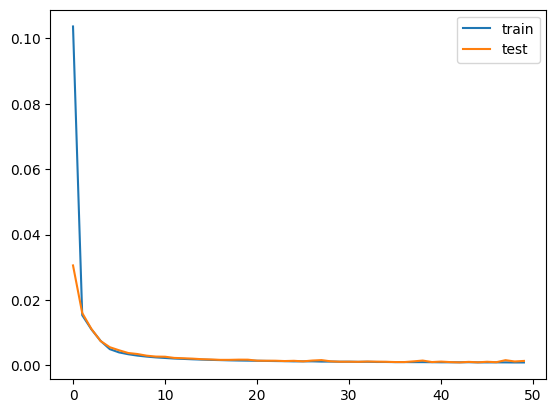

In [121]:
model = Sequential()
model.add(SimpleRNN(1, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history =model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [123]:
rnn_yhat = model.predict(test_X)
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
rnn_inv_yhat = concatenate((test_X1[:, 1:], rnn_yhat), axis=1)
rnn_predicted_df = pd.DataFrame(scaler.inverse_transform(rnn_inv_yhat), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution'])
rnn_inv_yhat = rnn_inv_yhat[:,-1]

test_y1 = test_y.reshape((len(test_y), 1))
rnn_inv_y1 = concatenate((test_X1[:, 1:], test_y1), axis=1)
rnn_actual_df = pd.DataFrame(scaler.inverse_transform(rnn_inv_y1), columns=['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution'])
rnn_inv_y1 = rnn_inv_y1[:,-1]

# Calculate rmse
rmse_rnn = sqrt(mean_squared_error(rnn_inv_y1, rnn_inv_yhat))

# Calculate mse
mse_rnn=mean_squared_error(rnn_inv_y1, rnn_inv_yhat)

# Calculate mae
mae_rnn=mae(rnn_inv_y1, rnn_inv_yhat)

# Calculate Maximum Prediction Error
max_prediction_error_rnn = np.max(np.abs(rnn_inv_y1, rnn_inv_yhat))

# Calculate the number of correct predictions

total_correct_predictions_rnn=0
K=np.zeros(len(rnn_inv_yhat))
K1=np.zeros(len(rnn_inv_yhat))

for i in range(1, len(rnn_inv_yhat)):
    if rnn_inv_yhat[i] > rnn_inv_yhat[i-1]:
        K[i]=1
    if rnn_inv_yhat[i] < rnn_inv_yhat[i-1]:
        K[i]=0
    if rnn_inv_y1[i] > rnn_inv_y1[i-1]:
        K1[i]=1
    if rnn_inv_y1[i] < rnn_inv_y1[i-1]:
        K1[i]=0
for i in range(1, len(rnn_inv_yhat)):
    if K[i]==K1[i]:
        total_correct_predictions_rnn=total_correct_predictions_rnn+1



# Calculate Accuracy
num_total_samples = len(rnn_inv_y1)
accuracy_rnn = total_correct_predictions_rnn / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_rnn = 1 - accuracy_rnn

# Print the results
print(f'Test RMSE: {rmse_rnn:.3f}')
print(f'Test MSE: {mse_rnn:.5f}')
print(f'Test MAE: {mae_rnn:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_rnn:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_rnn}')
print(f'Accuracy: {accuracy_rnn * 100:.2f}')
print(f'error rate: {error_rate_rnn * 100:.2f}')

946/946 [==============================] - 5s 5ms/step
Test RMSE: 0.002
Test MSE: 0.00000
Test MAE: 0.00138
Maximum Prediction Error: 0.994
Predict the correct number of days: 30258
Accuracy: 100.00
error rate: 0.00


In [125]:
dataset = dataset[['latitude', 'longitude', 'temperature', 'humidity', 'time', 'pollution']]

In [126]:
TRAIN_SPLIT=int(len(dataset)*0.8017836757990868)

In [127]:
TRAIN_SPLIT

108545

In [128]:
dataset=np.array(dataset)

In [130]:
def multivariate_data(dataset,target,start_index,end_index,history_size,
                      target_size,step,single_step=False):
    data=[]
    labels=[]

    start_index=start_index+history_size
    if end_index is None:
       end_index=len(dataset)-target_size

    for i in range(start_index, end_index):
       indices=range(i-history_size,i,step)
       data.append(dataset[indices])

       if single_step:
           labels.append(target[i+target_size])
       else:
           labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [131]:
past_history=16
STEP=1
n_step=3

x_train_multi, y_train_multi=multivariate_data(dataset,dataset[:,4],0,TRAIN_SPLIT,past_history,n_step,STEP,single_step=False)
x_test_multi, y_test_multi=multivariate_data(dataset,dataset[:,4],TRAIN_SPLIT,None,past_history,n_step,STEP,single_step=False)

In [132]:
scalers={}
for i in range(x_train_multi.shape[1]):
      scalers [i]=MinMaxScaler(feature_range=(0,1))
      x_train_multi[:,i,:]=scalers[i].fit_transform(x_train_multi[:,i,:])
for i in range(x_test_multi.shape[1]):
      x_test_multi[:,i,:]=scalers[i].fit_transform(x_test_multi[:,i,:])

In [133]:
scaler_y=MinMaxScaler(feature_range=(0,1))
y_train_multi=scaler_y.fit_transform(y_train_multi)
y_test_multi=scaler_y.fit_transform(y_test_multi)

In [134]:
x_train_multi_2d=x_train_multi.reshape(x_train_multi.shape[0], x_train_multi.shape[1]*x_train_multi.shape[2])
x_test_multi_2d=x_test_multi.reshape(x_test_multi.shape[0], x_test_multi.shape[1]*x_test_multi.shape[2])

In [135]:
MLP_model=Sequential()
MLP_model.add(Dense(50,activation='relu', input_dim=x_train_multi_2d.shape[1]))
MLP_model.add(Dense(1, activation='relu'))

MLP_model.add(Dense(n_step, activation='selu'))
MLP_model.compile(optimizer='adam',loss='mse', run_eagerly=True)
MLP_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                4850      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
 dense_5 (Dense)             (None, 3)                 6         
                                                                 
Total params: 4907 (19.17 KB)
Trainable params: 4907 (19.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
history_MLP=MLP_model.fit(x_train_multi_2d,y_train_multi,epochs=30,batch_size=72,validation_data=(x_test_multi_2d,y_test_multi))

Epoch 1/30
1508/1508 [==============================] - 54s 36ms/step - loss: 0.0711 - val_loss: 0.0659
Epoch 2/30
1508/1508 [==============================] - 48s 32ms/step - loss: 0.0711 - val_loss: 0.0658
Epoch 3/30
1508/1508 [==============================] - 49s 32ms/step - loss: 0.0711 - val_loss: 0.0659
Epoch 4/30
1508/1508 [==============================] - 50s 33ms/step - loss: 0.0711 - val_loss: 0.0660
Epoch 5/30
1508/1508 [==============================] - 48s 32ms/step - loss: 0.0711 - val_loss: 0.0661
Epoch 6/30
1508/1508 [==============================] - 49s 32ms/step - loss: 0.0711 - val_loss: 0.0661
Epoch 7/30
1508/1508 [==============================] - 50s 33ms/step - loss: 0.0711 - val_loss: 0.0658
Epoch 8/30
1508/1508 [==============================] - 49s 33ms/step - loss: 0.0711 - val_loss: 0.0662
Epoch 9/30
1508/1508 [==============================] - 87s 57ms/step - loss: 0.0711 - val_loss: 0.0658
Epoch 10/30
1508/1508 [==============================] - 49s 32m

In [138]:
y_predicted=MLP_model.predict(x_test_multi_2d)

838/838 [==============================] - 3s 4ms/step


In [139]:
y_predicted_inv=scaler_y.inverse_transform(y_predicted)

In [140]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# Calculate rmse
rmse_MLP = sqrt(mse(y_test_multi, y_predicted_inv))

# Calculate mse
mse_MLP = mse(y_test_multi, y_predicted_inv)

# Calculate mae
mae_MLP = mae(y_test_multi, y_predicted_inv)

# Calculate Maximum Prediction Error
max_prediction_error_MLP = np.max(np.abs(y_test_multi - y_predicted_inv))

# Calculate the number of correct predictions
predict_MLPp=y_predicted_inv[:,2]
y_test_multii=y_test_multi[:,2]
total_correct_predictions_MLP=0
K=np.zeros(len(predict_MLPp))
K1=np.zeros(len(predict_MLPp))

for i in range(1, len(predict_MLPp)):
    if predict_MLPp[i] > predict_MLPp[i-1]:
        K[i]=1
    if predict_MLPp[i] < predict_MLPp[i-1]:
        K[i]=0
    if y_test_multii[i] > y_test_multii[i-1]:
        K1[i]=1
    if y_test_multii[i] < y_test_multii[i-1]:
        K1[i]=0
for i in range(1, len(predict_MLPp)):
    if K[i]==K1[i]:
        total_correct_predictions_MLP=total_correct_predictions_MLP+1

# Calculate Accuracy
num_total_samples = len(predict_MLPp)
accuracy_MLP = total_correct_predictions_MLP  / num_total_samples

# Calculate Error Rate using Accuracy
error_rate_MLP = 1 - accuracy_MLP

# Print the results
print(f'Test RMSE: {rmse_MLP:.3f}')
print(f'Test MSE: {mse_MLP:.5f}')
print(f'Test MAE: {mae_MLP:.5f}')
print(f'Maximum Prediction Error: {max_prediction_error_MLP:.3f}')
print(f'Predict the correct number of days: {total_correct_predictions_MLP}')
print(f'Accuracy: {accuracy_MLP * 100:.2f}')
print(f'error rate: {error_rate_MLP * 100:.2f}')

Test RMSE: 1634535210.489
Test MSE: 2671705354328382976.00000
Test MAE: 1634535210.29957
Maximum Prediction Error: 1634567552.000
Predict the correct number of days: 13346
Accuracy: 49.77
error rate: 50.23


<font color='red'> results: accuracy-based and time-based</font>
use other metrics to calculate the accuracy
- **Evaluation Metrics**: Use appropriate evaluation metrics to quantify the performance of each model. For regression tasks like predicting pollution levels, common metrics include:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R^2) coefficient of determination
- also, similar to the method used in the paper, consider **"The correct number of days predicted by LSTM-based method as opposed to the other methods"**
  - check the paper titled **"Air quality prediction using CT-LSTM"** in the attached literature!

- you specificlly need to draw performance graphs similar to the following:

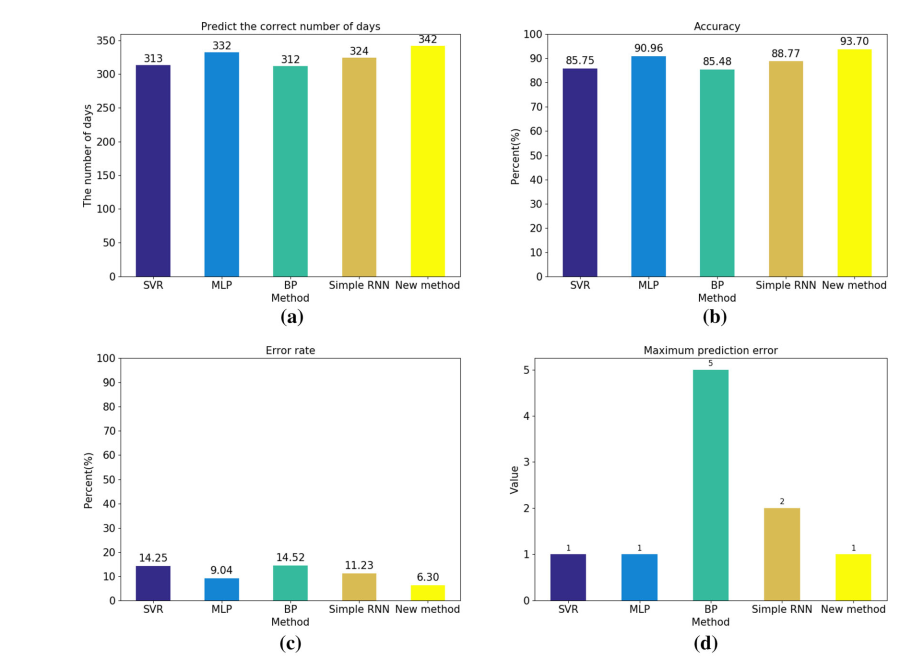

and the following

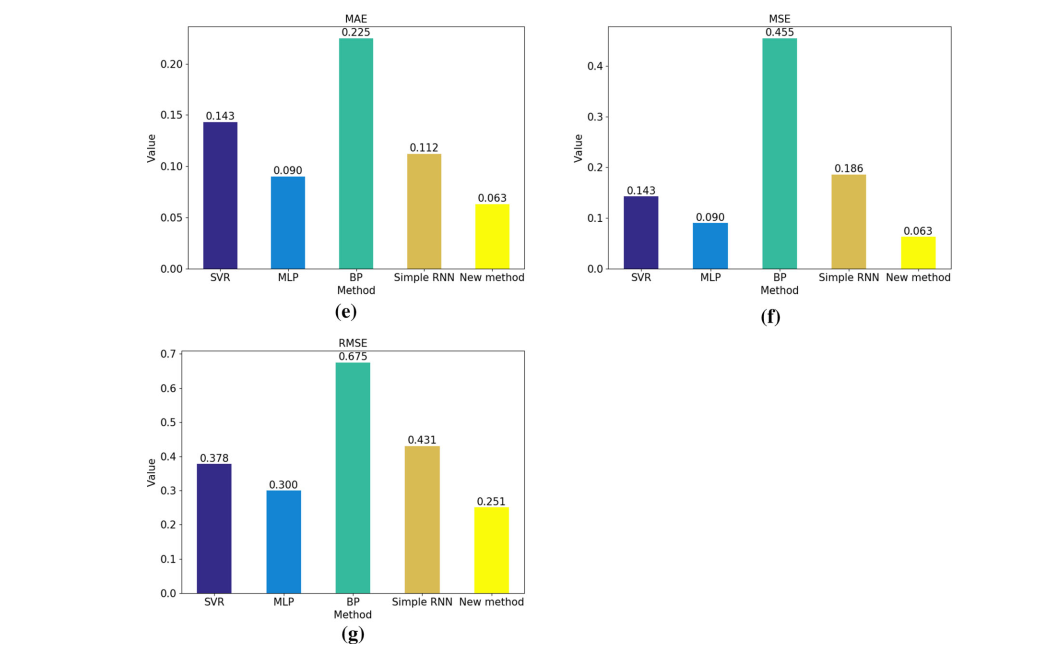

<font color='red'> the following figure is not clear, change x-axis (time) to something more visible and interpretable. For example, hour, day, week, etc.</font>

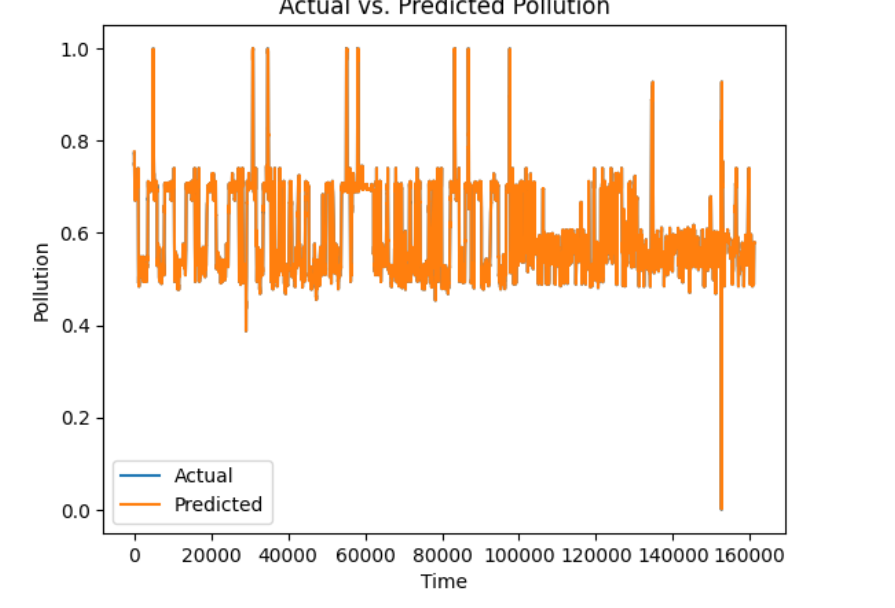

# Results

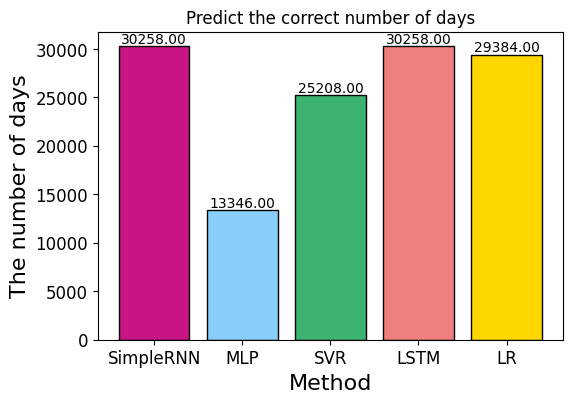

In [141]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [total_correct_predictions_rnn, total_correct_predictions_MLP, total_correct_predictions_SVR, total_correct_predictions_LSTM, total_correct_predictions_lr]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('The number of days', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Predict the correct number of days")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

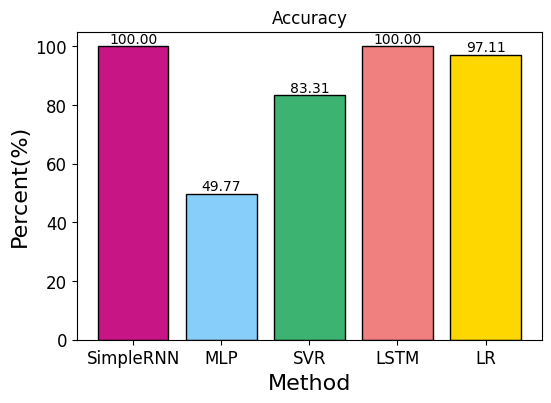

In [142]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [accuracy_rnn*100, accuracy_MLP*100, accuracy_SVR*100, accuracy_LSTM*100, accuracy_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Accuracy")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

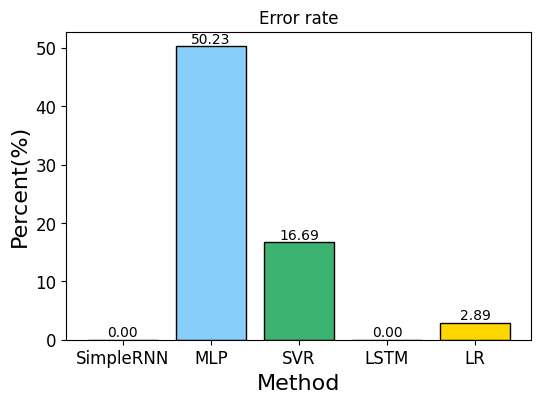

In [143]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [error_rate_rnn*100, error_rate_MLP*100, error_rate_SVR*100, error_rate_LSTM*100, error_rate_lr*100]

width = 0.2
colors = ['mediumvioletred','lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6, 4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Percent(%)', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error rate")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')

plt.show()

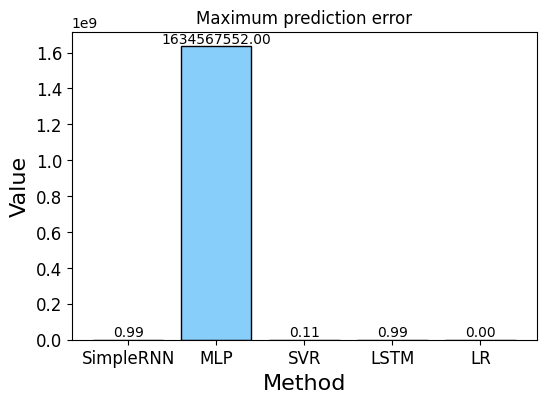

In [144]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [max_prediction_error_rnn, max_prediction_error_MLP, max_prediction_error_SVR, max_prediction_error_LSTM, max_prediction_error_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Maximum prediction error")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.2f}', ha='center', va='bottom')


plt.show()

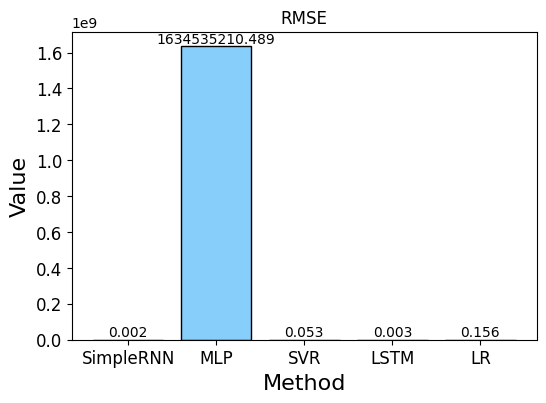

In [145]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN','MLP', 'SVR', 'LSTM', 'LR']
y = [rmse_rnn, rmse_MLP, rmse_svr, rmse_LSTM, rmse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE")

for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')


plt.show()

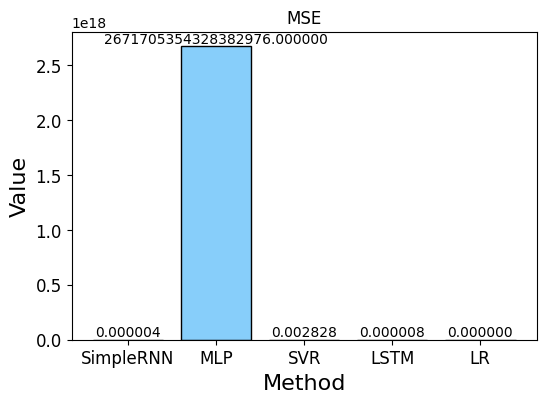

In [146]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mse_rnn, mse_MLP, mse_SVR, mse_LSTM, mse_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.6f}', ha='center', va='bottom')


plt.show()

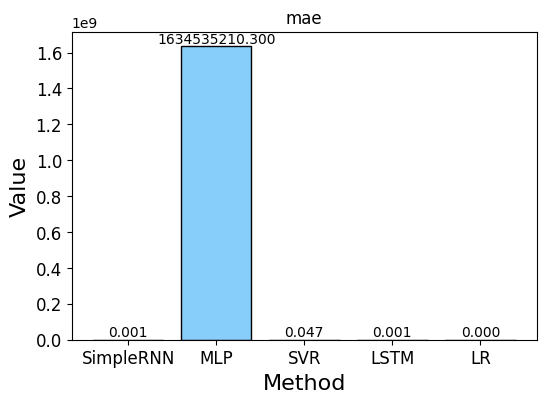

In [147]:
import matplotlib.pyplot as plt
import numpy as np

x = ['SimpleRNN', 'MLP', 'SVR', 'LSTM', 'LR']
y = [mae_rnn, mae_MLP, mae_SVR, mae_LSTM, mae_lr]

width = 0.2
colors = ['mediumvioletred', 'lightskyblue', 'mediumseagreen', 'lightcoral', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3, 4, 5], y, color=colors, edgecolor='black')

plt.xlabel('Method', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xticks([1, 2, 3, 4, 5], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("mae")


for i, bar in enumerate(bars):
    bar.set_label(x[i])
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y[i]:.3f}', ha='center', va='bottom')

plt.show()

In [148]:
lstm_actual_df.head()

,time,latitude,longitude,temperature,humidity,pollution
0,1.634909e+09,40.754551,-73.841713,-10.142200,22.672869,4.379982
1,1.634909e+09,40.754551,-73.846474,20.324400,3.593472,2.316173
2,1.634909e+09,40.754551,-73.835854,4.709398,29.893915,5.161079
3,1.634909e+09,40.754551,-73.839180,0.892397,2.724588,2.222187
4,1.634909e+09,40.754551,-73.839180,0.823002,3.238960,2.277826


In [175]:
actual = lstm_actual_df['pollution'].values
predicted = lstm_predicted_df['pollution'].values
dates = lstm_actual_df['time'].values

In [176]:
from datetime import datetime

dates = [datetime.fromtimestamp(int(timestamp)) for timestamp in dates]

In [177]:
dates = dates[::6000]
actual = actual[::6000]
predicted = predicted[::6000]

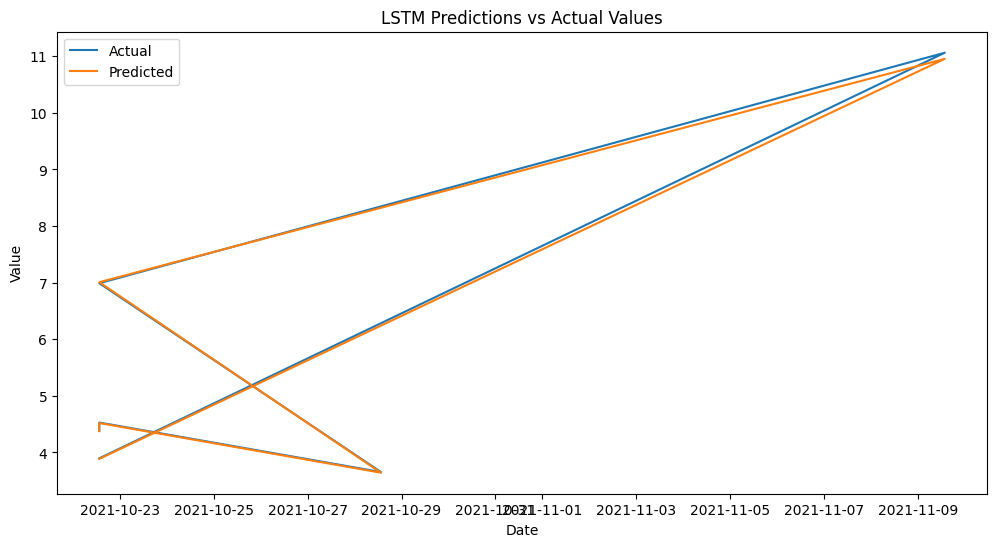

In [178]:
plt.figure(figsize=(12, 6))
plt.plot(dates, actual, label='Actual')
plt.plot(dates, predicted, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Predictions vs Actual Values')
plt.legend()
plt.show()

Maximum pollution value: 12.74441924
Minimum pollution value: 1.568473024


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


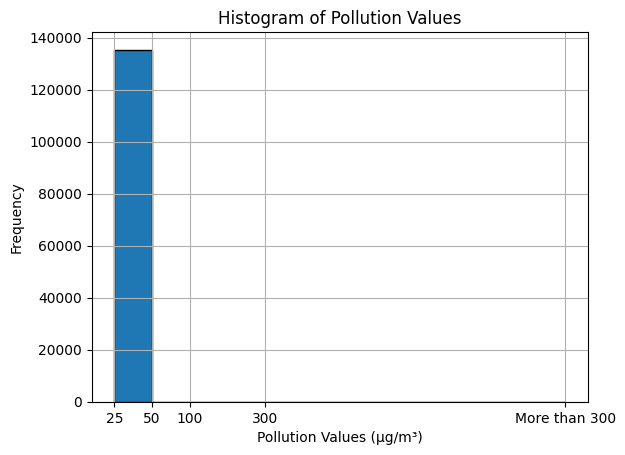

No outliers found.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# 1. Determine maximum and minimum values of pollution
max_pollution = merged_data['pollution'].max()
min_pollution = merged_data['pollution'].min()
print(f"Maximum pollution value: {max_pollution}")
print(f"Minimum pollution value: {min_pollution}")

# 2. Create bins and labels
bins = [0, 25, 50, 100, 300, np.inf]
bin_labels = ['25', '50', '100', '300', 'More than 300']

# 3. Plot histogram
plt.hist(merged_data['pollution'], bins=bins, edgecolor='black')
plt.xlabel('Pollution Values (µg/m³)')
plt.ylabel('Frequency')
plt.title('Histogram of Pollution Values')

# 4. Adjust x-axis ticks and labels
plt.xticks(bins[:-1], bin_labels)

# 5. Show grid
plt.grid(True)

# 6. Show plot
plt.show()

# 7. Check for outliers
outliers = merged_data[merged_data['pollution'] > 300]
if len(outliers) > 0:
    print(f"Number of outliers: {len(outliers)}")
    # If outliers are small in number, drop them
    # merged_data = merged_data[merged_data['pollution'] <= 300]
else:
    print("No outliers found.")

In [ ]:
merged_data.index = pd.to_datetime(merged_data.index)

In [ ]:
# Explore temporal distribution
start_date = merged_data.index.min()
end_date = merged_data.index.max()
data_duration = end_date - start_date
print("Start Date:", start_date)
print("End Date:", end_date)
print("Data Duration:", data_duration)


Start Date: 2021-09-10 12:29:09
End Date: 2021-12-15 14:35:55
Data Duration: 96 days 02:06:46


<Axes: >

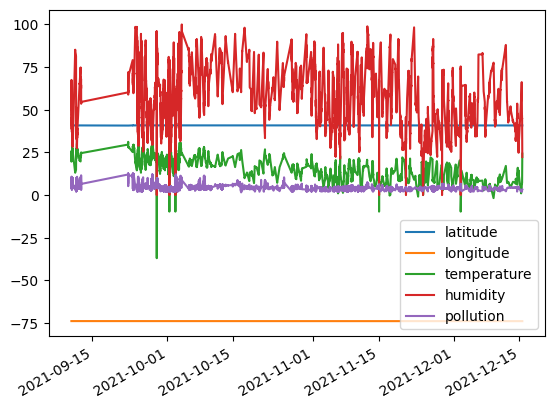

In [ ]:
# Analyze spatial distribution
#Visualize the spatial distribution of pollution levels using maps.
#Identify areas with high and low pollution concentrations.
merged_data.plot(column='pollution', legend=True)


<Axes: title={'center': 'Pollution Levels Over Time'}>

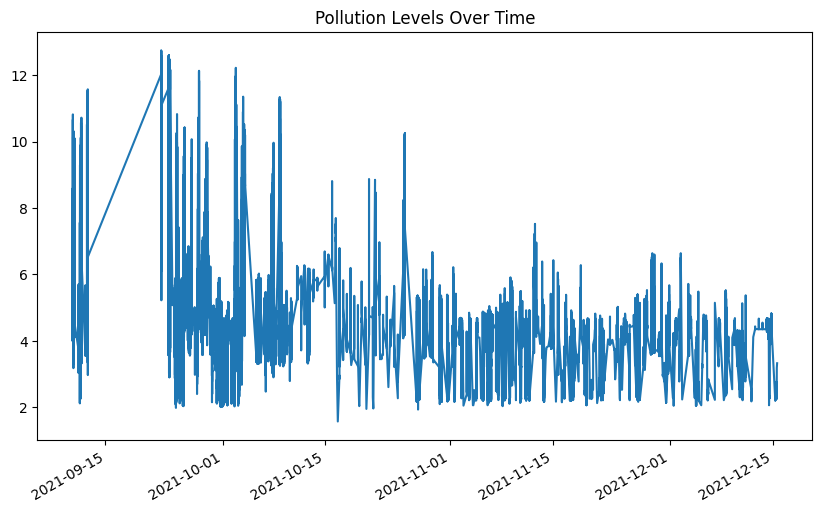

In [ ]:
merged_data['pollution'].plot(figsize=(10, 6), title='Pollution Levels Over Time')

Correlation Matrix:
             pollution  temperature  humidity
pollution     1.000000     0.490709  0.005008
temperature   0.490709     1.000000 -0.215808
humidity      0.005008    -0.215808  1.000000


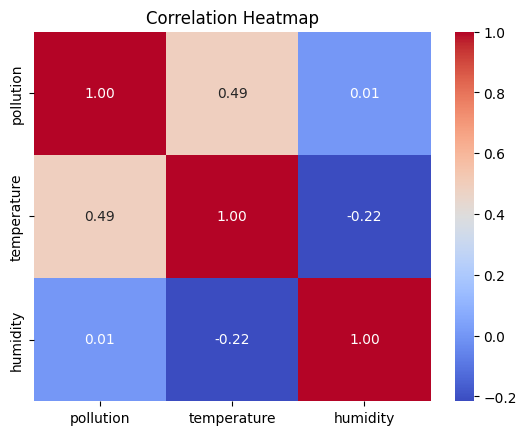

In [ ]:
import seaborn as sns
#This code calculates the correlation matrix between pollution levels, temperature, and humidity, and then visualizes the correlations using a heatmap.
# Explore correlations
corr_matrix = merged_data[['pollution', 'temperature', 'humidity']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

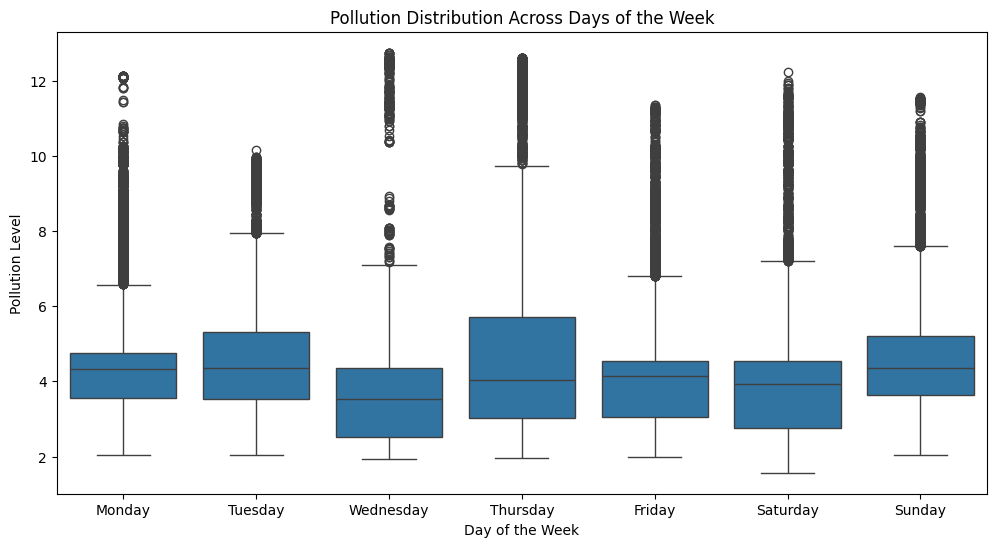

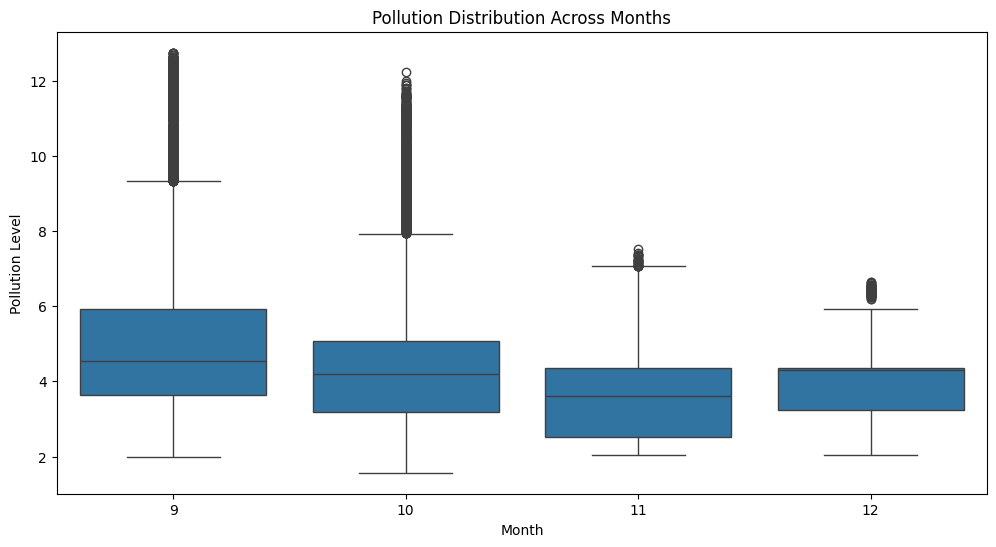

Daily Summary Statistics:
                     count      mean  std       min       25%       50%  \
date                                                                      
2021-09-10 12:29:09    1.0  4.671425  NaN  4.671425  4.671425  4.671425   
2021-09-10 12:29:12    1.0  4.314229  NaN  4.314229  4.314229  4.314229   
2021-09-10 12:29:14    1.0  4.671425  NaN  4.671425  4.671425  4.671425   
2021-09-10 12:29:17    1.0  6.243026  NaN  6.243026  6.243026  6.243026   
2021-09-10 12:29:19    1.0  5.406576  NaN  5.406576  5.406576  5.406576   
...                    ...       ...  ...       ...       ...       ...   
2021-12-15 13:34:01    1.0  3.181809  NaN  3.181809  3.181809  3.181809   
2021-12-15 13:34:06    1.0  3.181809  NaN  3.181809  3.181809  3.181809   
2021-12-15 13:34:11    1.0  3.181809  NaN  3.181809  3.181809  3.181809   
2021-12-15 13:34:16    1.0  3.181809  NaN  3.181809  3.181809  3.181809   
2021-12-15 14:35:55    1.0  3.323838  NaN  3.323838  3.323838  3.323838   

In [ ]:
# Step 1: Extract temporal information
merged_data['day_of_week'] = merged_data.index.dayofweek  # Extract day of the week (Monday = 0, Sunday = 6)
merged_data['month'] = merged_data.index.month  # Extract month
merged_data['year'] = merged_data.index.year  # Extract year

# Step 2: Analyze distribution of pollution levels across days of the week and months
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='pollution', data=merged_data)
plt.title('Pollution Distribution Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pollution Level')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='pollution', data=merged_data)
plt.title('Pollution Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Pollution Level')
plt.show()



# Step 3: Calculate summary statistics
daily_summary = merged_data.groupby('date')['pollution'].describe()
monthly_summary = merged_data.groupby(['year', 'month'])['pollution'].describe()

print("Daily Summary Statistics:")
print(daily_summary)

print("\nMonthly Summary Statistics:")
print(monthly_summary)

In [ ]:
import pandas as pd
import scipy.stats as stats


# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*[group['pollution'] for name, group in merged_data.groupby('geohash')])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in pollution levels across different geohash categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in pollution levels across different geohash categories.")

F-statistic: 102.78796243610519
p-value: 0.0
Reject the null hypothesis: There is a significant difference in pollution levels across different geohash categories.


In [ ]:
import pandas as pd
from scipy.stats import rankdata
'''
if you specifically want a measure similar to Kendall's correlation coefficient but for a
categorical predictor and a continuous outcome, you might consider calculating the correlation between the ranks of the categorical
variable and the continuous variable
'''



# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('neighborhood')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('neighborhood').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")

Reverse Kendall's correlation coefficient: 0.3031491751402424


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('geohash')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('geohash').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")


Reverse Kendall's correlation coefficient: 0.18607703406282353


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Rank the pollution values
merged_data['pollution_rank'] = rankdata(merged_data['pollution'])

# Calculate the average rank for each category
avg_rank_per_category = merged_data.groupby('borough')['pollution_rank'].mean()

# Calculate the correlation between the ranks of geohash and pollution
correlation = avg_rank_per_category.corr(merged_data.groupby('borough').size(), method='kendall')

print(f"Reverse Kendall's correlation coefficient: {correlation}")

Reverse Kendall's correlation coefficient: 0.19999999999999998


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df['geohash'] = df['geohash'].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 3  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, 'geohash', precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_borough = kendall_correlation(merged_data, 'borough', precision)

print(f"Reverse Kendall's correlation coefficient for geohash: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for borough: {correlation_borough}")

Reverse Kendall's correlation coefficient for geohash: 1.0
Reverse Kendall's correlation coefficient for neighborhood: -0.10734744162189888
Reverse Kendall's correlation coefficient for borough: -0.39999999999999997


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df['geohash'] = df['geohash'].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 4  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, 'geohash', precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_borough = kendall_correlation(merged_data, 'borough', precision)

print(f"Reverse Kendall's correlation coefficient for geohash: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for borough: {correlation_borough}")

Reverse Kendall's correlation coefficient for geohash: 1.0
Reverse Kendall's correlation coefficient for neighborhood: -0.10734744162189888
Reverse Kendall's correlation coefficient for borough: -0.39999999999999997


In [ ]:
import pandas as pd
from scipy.stats import rankdata

# Define function to calculate Kendall's correlation coefficient
def kendall_correlation(df, column, precision):
    # Round geohash to the specified precision
    df['geohash'] = df['geohash'].str.slice(0, precision)

    # Rank the pollution values
    df['pollution_rank'] = rankdata(df[column])

    # Calculate the average rank for each category
    avg_rank_per_category = df.groupby(column)['pollution_rank'].mean()

    # Calculate the correlation between the ranks of the categorical variable and pollution
    correlation = avg_rank_per_category.corr(df.groupby(column).size(), method='kendall')

    return correlation

# Assuming you already have merged_data DataFrame

# Calculate Kendall's correlation coefficient for different categorical variables with specified precision
precision = 5  # Change this to the desired precision level for geohash
correlation_geohash = kendall_correlation(merged_data, 'geohash', precision)
correlation_neighborhood = kendall_correlation(merged_data, 'neighborhood', precision)
correlation_borough = kendall_correlation(merged_data, 'borough', precision)

print(f"Reverse Kendall's correlation coefficient for geohash: {correlation_geohash}")
print(f"Reverse Kendall's correlation coefficient for neighborhood: {correlation_neighborhood}")
print(f"Reverse Kendall's correlation coefficient for borough: {correlation_borough}")


Reverse Kendall's correlation coefficient for geohash: 1.0
Reverse Kendall's correlation coefficient for neighborhood: -0.10734744162189888
Reverse Kendall's correlation coefficient for borough: -0.39999999999999997


In [ ]:
#METHOD 2: Spearman's Rank Correlation Coefficient

import pandas as pd
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient between geohash and pollution
geohash_corr, geohash_p_value = spearmanr(merged_data['geohash'], merged_data['pollution'])

# Calculate Spearman's rank correlation coefficient between neighborhood and pollution
neighborhood_corr, neighborhood_p_value = spearmanr(merged_data['neighborhood'], merged_data['pollution'])

# Calculate Spearman's rank correlation coefficient between borough and pollution
borough_corr, borough_p_value = spearmanr(merged_data['borough'], merged_data['pollution'])

print("Spearman's Rank Correlation Coefficients:")
print(f"Geohash vs. Pollution: {geohash_corr}")
print(f"Neighborhood vs. Pollution: {neighborhood_corr}")
print(f"Borough vs. Pollution: {borough_corr}")

print("\nP-values:")
print(f"Geohash vs. Pollution: {geohash_p_value}")
print(f"Neighborhood vs. Pollution: {neighborhood_p_value}")
print(f"Borough vs. Pollution: {borough_p_value}")

Spearman's Rank Correlation Coefficients:
Geohash vs. Pollution: -0.06654169631677545
Neighborhood vs. Pollution: 0.011637772263997271
Borough vs. Pollution: 0.08611017903128607

P-values:
Geohash vs. Pollution: 4.454497640901313e-166
Neighborhood vs. Pollution: 1.5984415142310416e-06
Borough vs. Pollution: 4.068933168365492e-277


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5]

# Initialize dictionaries to store Spearman's rank correlation coefficients and p-values
spearman_results = {}

# Iterate over each precision level and calculate Spearman's rank correlation coefficient
for precision in precision_levels:
    # Create geohash codes with the current precision level
    merged_data[f'geohash_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
    # Calculate Spearman's rank correlation coefficient between geohash and pollution
    correlation, p_value = spearmanr(merged_data[f'geohash_precision_{precision}'], merged_data['pollution'])
    # Store results in dictionary
    spearman_results[f'geohash_precision_{precision}'] = (correlation, p_value)

# Print Spearman's rank correlation coefficients and p-values for geohash
print("Spearman's Rank Correlation Coefficients for Geohash:")
for precision, result in spearman_results.items():
    print(f"Precision {precision.split('_')[-1]}: {result[0]}")
    print(f"P-value: {result[1]}")


Spearman's Rank Correlation Coefficients for Geohash:
Precision 3: -0.06654169631677545
P-value: 4.454497640901313e-166
Precision 4: -0.03478746127459427
P-value: 1.1042075713576446e-46
Precision 5: -0.005006042655342761
P-value: 0.03901315711545015


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)

"""ANOVA can be used to assess whether the means of pollution levels differ significantly across different geohash categories.
ANOVA compares the means of three or more groups to determine if there are statistically significant differences between them
perform ANOVA in Python using the f_oneway function from the scipy.stats module
This code calculates the F-statistic and p-value for the ANOVA test, where:
The F-statistic measures the ratio of the variance between groups to the variance within groups.
The p-value indicates the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there are statistically
significant differences in pollution levels across different geohash categories. Otherwise,
you fail to reject the null hypothesis, suggesting no significant differences in pollution levels between the groups.
"""
from scipy.stats import f_oneway


# Extract pollution levels for each neighborhood, borough, and geohash category
neighborhood_groups = [merged_data[merged_data['neighborhood'] == category]['pollution'] for category in merged_data['neighborhood'].unique()]
borough_groups = [merged_data[merged_data['borough'] == category]['pollution'] for category in merged_data['borough'].unique()]
geohash_groups = [merged_data[merged_data['geohash'] == category]['pollution'] for category in merged_data['geohash'].unique()]

# Perform ANOVA tests
f_statistic_neighborhood, p_value_neighborhood = f_oneway(*neighborhood_groups)
f_statistic_borough, p_value_borough = f_oneway(*borough_groups)
f_statistic_geohash, p_value_geohash = f_oneway(*geohash_groups)

print("ANOVA Test Results:")
print(f"Neighborhood - F-statistic: {f_statistic_neighborhood}, P-value: {p_value_neighborhood}")
print(f"Borough - F-statistic: {f_statistic_borough}, P-value: {p_value_borough}")
print(f"Geohash - F-statistic: {f_statistic_geohash}, P-value: {p_value_geohash}")

ANOVA Test Results:
Neighborhood - F-statistic: 194.2967984990712, P-value: 0.0
Borough - F-statistic: 1571.4452929273557, P-value: 0.0
Geohash - F-statistic: 3520.2944091142294, P-value: 0.0


In [ ]:
#METHOD 3: ANOVA (Analysis of Variance)

from scipy.stats import f_oneway
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5]

# Initialize dictionaries to store ANOVA test results
anova_results = {'neighborhood': {}, 'borough': {}, 'geohash': {}}

# Iterate over each feature and precision level and perform ANOVA test
for feature in anova_results.keys():
    if feature == 'geohash':
        for precision in precision_levels:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
            # Extract pollution levels for each geohash category
            geohash_groups = [merged_data[merged_data[f'{feature}_precision_{precision}'] == category]['pollution'] for category in merged_data[f'{feature}_precision_{precision}'].unique()]
            # Perform ANOVA test for geohash with current precision
            f_statistic, p_value = f_oneway(*geohash_groups)
            # Store results in dictionary
            anova_results[feature][f'precision_{precision}'] = (f_statistic, p_value)
    else:
        # Extract pollution levels for each category
        groups = [merged_data[merged_data[feature] == category]['pollution'] for category in merged_data[feature].unique()]
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        # Store results in dictionary
        anova_results[feature] = (f_statistic, p_value)

# Print ANOVA test results
print("ANOVA Test Results:")
for feature, result in anova_results.items():
    if feature == 'geohash':
        print(f"For {feature}:")
        for precision, (f_statistic, p_value) in result.items():
            print(f"  Precision Level {precision}: F-statistic = {f_statistic}, P-value = {p_value}")
    else:
        print(f"For {feature}: F-statistic = {result[0]}, P-value = {result[1]}")


ANOVA Test Results:
For neighborhood: F-statistic = 194.2967984990712, P-value = 0.0
For borough: F-statistic = 1571.4452929273557, P-value = 0.0
For geohash:
  Precision Level precision_3: F-statistic = 3520.2944091142294, P-value = 0.0
  Precision Level precision_4: F-statistic = 1762.629585813516, P-value = 0.0
  Precision Level precision_5: F-statistic = 412.3721028769785, P-value = 0.0


In [ ]:
# METHOD 4:

from scipy.stats import kruskal

# Extract pollution levels for each category
neighborhood_groups = [merged_data[merged_data['neighborhood'] == category]['pollution'] for category in merged_data['neighborhood'].unique()]
borough_groups = [merged_data[merged_data['borough'] == category]['pollution'] for category in merged_data['borough'].unique()]
geohash_groups = [merged_data[merged_data['geohash'] == category]['pollution'] for category in merged_data['geohash'].unique()]

# Perform Kruskal-Wallis test for neighborhood
statistic_neighborhood, p_value_neighborhood = kruskal(*neighborhood_groups)

# Perform Kruskal-Wallis test for borough
statistic_borough, p_value_borough = kruskal(*borough_groups)

# Perform Kruskal-Wallis test for geohash
statistic_geohash, p_value_geohash = kruskal(*geohash_groups)

print("Kruskal-Wallis Test Results:")
print(f"Neighborhood: Statistic = {statistic_neighborhood}, P-value = {p_value_neighborhood}")
print(f"Borough: Statistic = {statistic_borough}, P-value = {p_value_borough}")
print(f"Geohash: Statistic = {statistic_geohash}, P-value = {p_value_geohash}")


Kruskal-Wallis Test Results:
Neighborhood: Statistic = 3194.7088275131123, P-value = 0.0
Borough: Statistic = 1281.6427998977276, P-value = 3.178456778603967e-276
Geohash: Statistic = 752.7255492814534, P-value = 1.025109961523071e-165


In [ ]:
# METHOD 4:

from scipy.stats import kruskal
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Define the precision levels to test
precision_levels = [3, 4, 5]

# Initialize dictionaries to store Kruskal-Wallis test results
kruskal_results = {'neighborhood': {}, 'borough': {}, 'geohash': {}}

# Iterate over each feature and precision level and perform Kruskal-Wallis test
for feature in kruskal_results.keys():
    if feature == 'geohash':
        for precision in precision_levels:
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)
            # Extract pollution levels for each geohash category
            geohash_groups = [merged_data[merged_data[f'{feature}_precision_{precision}'] == category]['pollution'] for category in merged_data[f'{feature}_precision_{precision}'].unique()]
            # Perform Kruskal-Wallis test for geohash with current precision
            statistic, p_value = kruskal(*geohash_groups)
            # Store results in dictionary
            kruskal_results[feature][f'precision_{precision}'] = (statistic, p_value)
    else:
        # Extract pollution levels for each category
        groups = [merged_data[merged_data[feature] == category]['pollution'] for category in merged_data[feature].unique()]
        # Perform Kruskal-Wallis test
        statistic, p_value = kruskal(*groups)
        # Store results in dictionary
        kruskal_results[feature] = (statistic, p_value)

# Print Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
for feature, result in kruskal_results.items():
    if feature == 'geohash':
        print(f"For {feature}:")
        for precision, (statistic, p_value) in result.items():
            print(f"  Precision Level {precision}: Statistic = {statistic}, P-value = {p_value}")
    else:
        print(f"For {feature}: Statistic = {result[0]}, P-value = {result[1]}")


Kruskal-Wallis Test Results:
For neighborhood: Statistic = 3194.7088275131123, P-value = 0.0
For borough: Statistic = 1281.6427998977276, P-value = 3.178456778603967e-276
For geohash:
  Precision Level precision_3: Statistic = 752.7255492814534, P-value = 1.025109961523071e-165
  Precision Level precision_4: Statistic = 767.5797478376305, P-value = 2.0997884702223404e-167
  Precision Level precision_5: Statistic = 1549.7445498734908, P-value = 0.0


In [ ]:
# METHOD 5: Kendall's Tau Correlation Coefficient
"""
Kendall's Tau Correlation Coefficient: This measures the strength and direction of association between the ranks of 'geohash' and 'pollution',
suitable for ordinal data or when the relationship is not necessarily linear.
Kendall's Tau is a rank-based correlation coefficient that measures the ordinal association between two variables.

This code calculates Kendall's Tau correlation coefficient and the associated p-value. The correlation coefficient ranges from -1 to 1, where:

1 indicates a perfect positive association.
-1 indicates a perfect negative association.
0 indicates no association.
The p-value indicates the significance of the correlation coefficient.
If the p-value is less than a chosen significance level (e.g., 0.05),
you can reject the null hypothesis and conclude that there is a statistically
significant association between 'geohash' and 'pollution'. Otherwise, you fail to reject the null hypothesis, suggesting no significant association.
"""


from scipy.stats import kendalltau
import geohash2

# Define a function to create geohash codes with different precision levels
def create_geohash_precision(latitude, longitude, precision):
    return geohash2.encode(latitude, longitude, precision=precision)

# Assuming you already have merged_data DataFrame

# Define a list of features to consider (neighborhood, borough, and geohash)
features = ['neighborhood', 'borough', 'geohash']

# Define a list of precision levels to test
precision_levels = [3, 4, 5]  # Adjust as needed

# Initialize dictionaries to store correlation coefficients and p-values for each feature and precision level
correlation_results = {feature: {} for feature in features}
p_value_results = {feature: {} for feature in features}

# Iterate over each feature and precision level and compute Kendall's Tau correlation coefficient
for feature in features:
    for precision in precision_levels:
        if feature == 'geohash':
            # Create geohash codes with the current precision level
            merged_data[f'{feature}_precision_{precision}'] = merged_data.apply(lambda row: create_geohash_precision(row['latitude'], row['longitude'], precision), axis=1)

            # Calculate Kendall's Tau correlation coefficient for geohash
            correlation, p_value = kendalltau(merged_data[f'{feature}_precision_{precision}'], merged_data['pollution'])
        else:
            # Assuming you have neighborhood and borough data available in the DataFrame
            # Calculate Kendall's Tau correlation coefficient for neighborhood and borough
            correlation, p_value = kendalltau(merged_data[feature], merged_data['pollution'])

        # Store results in dictionaries
        correlation_results[feature][precision] = correlation
        p_value_results[feature][precision] = p_value

# Print correlation coefficients and p-values for each feature and precision level
for feature in features:
    print(f"Kendall's Tau Correlation Coefficient Results for {feature}:")
    for precision, correlation in correlation_results[feature].items():
        print(f"For {feature} Precision Level {precision}: Correlation = {correlation}, P-value = {p_value_results[feature][precision]}")


Kendall's Tau Correlation Coefficient Results for neighborhood:
For neighborhood Precision Level 3: Correlation = 0.009259718338660744, P-value = 1.3397951600462843e-07
For neighborhood Precision Level 4: Correlation = 0.009259718338660744, P-value = 1.3397951600462843e-07
For neighborhood Precision Level 5: Correlation = 0.009259718338660744, P-value = 1.3397951600462843e-07
Kendall's Tau Correlation Coefficient Results for borough:
For borough Precision Level 3: Correlation = 0.07034127731459229, P-value = 4.592161998189867e-276
For borough Precision Level 4: Correlation = 0.07034127731459229, P-value = 4.592161998189867e-276
For borough Precision Level 5: Correlation = 0.07034127731459229, P-value = 4.592161998189867e-276
Kendall's Tau Correlation Coefficient Results for geohash:
For geohash Precision Level 3: Correlation = -0.054383698700505266, P-value = 1.0251099615631986e-165
For geohash Precision Level 4: Correlation = -0.028405622420667093, P-value = 1.2769262199553581e-46
For

In [ ]:
#We group the DataFrame by the 'geohash' column and calculate the correlation coefficient between pollution values within each geohash group.
#The result is a correlation coefficient matrix where each row and column represent a unique geohash value, and the values represent the correlation
#coefficient between pollution values associated with those geohashes.

#Calculate correlation coefficient matrix based on geohash values and pollution values
correlation_matrix = merged_data.groupby('geohash')['pollution'].corr(merged_data['pollution'])

# Print correlation coefficient matrix
print("Correlation Coefficient Matrix based on Geohash values:")
print(correlation_matrix)

Correlation Coefficient Matrix based on Geohash values:
geohash
dr5    1.000000
dr7    0.993066
Name: pollution, dtype: float64


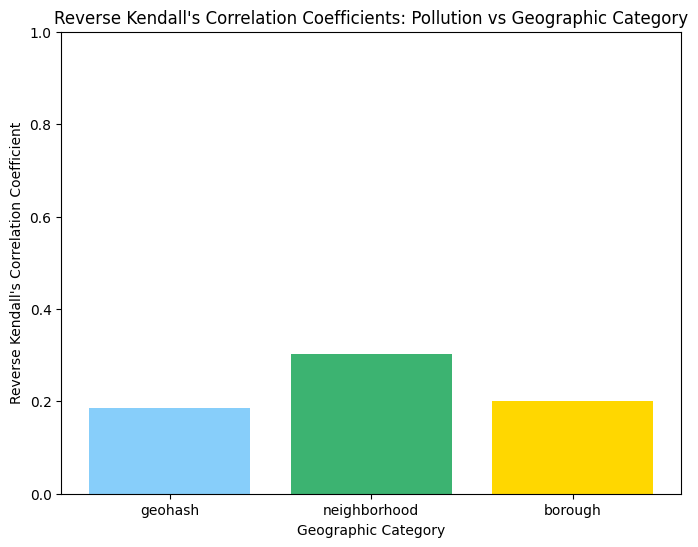

In [ ]:
#Correlation Coefficients between Pollution and geohash (respectively, neighborhood and borough)variables obtained from Reverse Kendall
import matplotlib.pyplot as plt

# Names of the correlation methods
categories = ["geohash", "neighborhood", "borough"]

# Corresponding correlation coefficients
correlation_values = [0.18607703406282353, 0.3031491751402424 , 0.19999999999999998]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(categories, correlation_values, color=colors)
plt.xlabel('Geographic Category')
plt.ylabel("Reverse Kendall's Correlation Coefficient")
plt.title("Reverse Kendall's Correlation Coefficients: Pollution vs Geographic Category")
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

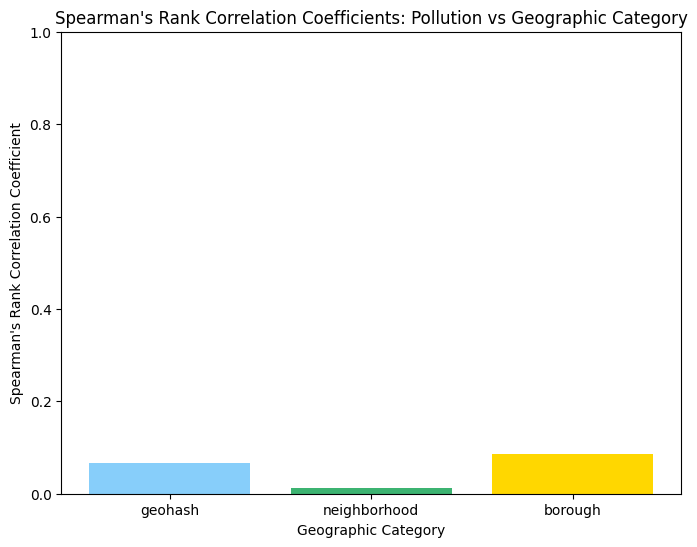

In [ ]:
#Correlation Coefficients between Pollution and geohash (respectively, neighborhood and borough)variables obtained from Spearman's Rank
import matplotlib.pyplot as plt

# Names of the correlation methods
categories = ["geohash", "neighborhood", "borough"]

# Corresponding correlation coefficients
correlation_values = [0.06654169631677545, 0.011637772263997271, 0.08611017903128607]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(categories, correlation_values, color=colors)
plt.xlabel('Geographic Category')
plt.ylabel("Spearman's Rank Correlation Coefficient")
plt.title("Spearman's Rank Correlation Coefficients: Pollution vs Geographic Category")
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

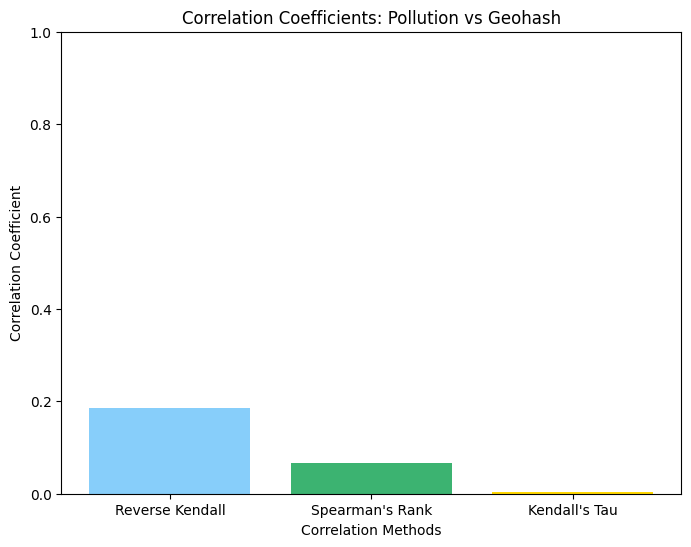

In [ ]:
#Correlation Coefficients between Pollution and geohash variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [0.18607703406282353, 0.06654169631677545 , 0.003214327504560284]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs Geohash')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

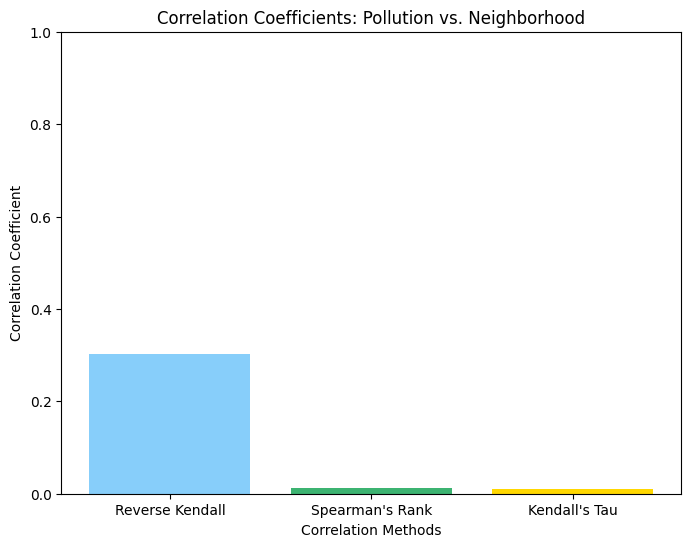

In [ ]:
#Correlation Coefficients between Pollution and Neighborhood variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [0.3031491751402424, 0.011637772263997271 , 0.009259718338660744]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs. Neighborhood')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()

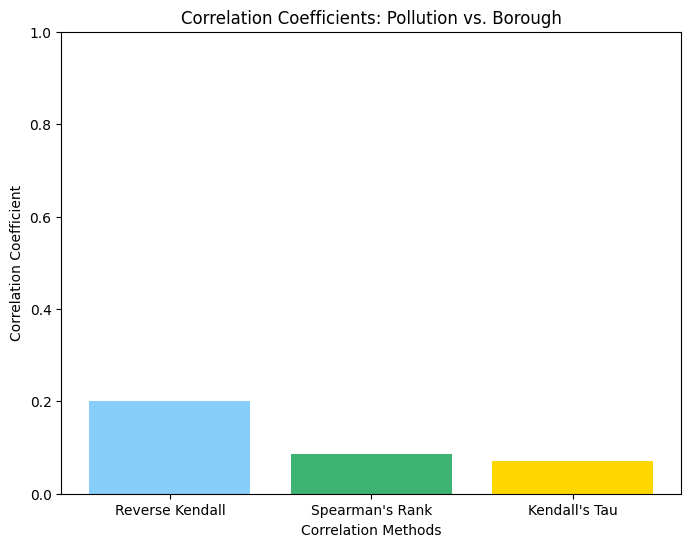

In [ ]:
#Correlation Coefficients between Pollution and Borough variables obtained from different methods
import matplotlib.pyplot as plt

# Names of the correlation methods
methods = ["Reverse Kendall", "Spearman's Rank", "Kendall's Tau"]

# Corresponding correlation coefficients
correlation_values = [0.19999999999999998, 0.08611017903128607, 0.07034127731459229]

# Plotting
plt.figure(figsize=(8, 6))
colors = ['lightskyblue', 'mediumseagreen', 'gold']
plt.bar(methods, correlation_values, color=colors)
plt.xlabel('Correlation Methods')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients: Pollution vs. Borough')
plt.ylim(0, 1)  # Set the y-axis limits to range from 0 to 1 for correlation coefficients
plt.show()